**Importing Necessary Packages**
---


In [ ]:
import pandas as pd # for loading the datasets
import numpy as np  # for performing numeric computation
import pickle#to serialize objects for permanent storage
import matplotlib.pyplot as plt # for ploating 
from scipy import stats # for different scietific computation eg. statistical function
import tensorflow as tf # backend development
import seaborn as sns # sugarcoating for beautifying our graph
from sklearn import metrics # training and testing and spliting of data and metrics to judge our model
from sklearn.model_selection import train_test_split

#matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 42
#Load the Drive helper and mount
from google.colab import drive
#This will prompt for authorization # to take permission from user to use google drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
columns = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('/content/drive/My Drive/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df1 = pd.read_csv('/content/drive/My Drive/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()
df.head()


,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x-axis     1098203 non-null  float64
 4   y-axis     1098203 non-null  float64
 5   z-axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


**Remove unwanted activity**
---

In [ ]:
df1.activity.unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [ ]:
df1 = df1.drop(df1[df1.activity == 'Upstairs'].index)

In [ ]:
df1 = df1.drop(df1[df1.activity == 'Downstairs'].index)

In [ ]:
df1 = df1.drop(df1[df1.activity == 'Jogging'].index)

In [ ]:
df1.activity.unique()

array(['Walking', 'Sitting', 'Standing'], dtype=object)

**EXPLORATION**
---
The columns we will be most interested in are activity, x-axis, y-axis, and z-axis. 

In [ ]:
countOfActivity = df1['activity'].value_counts()
print(countOfActivity)

Walking     424398
Sitting      59939
Standing     48395
Name: activity, dtype: int64


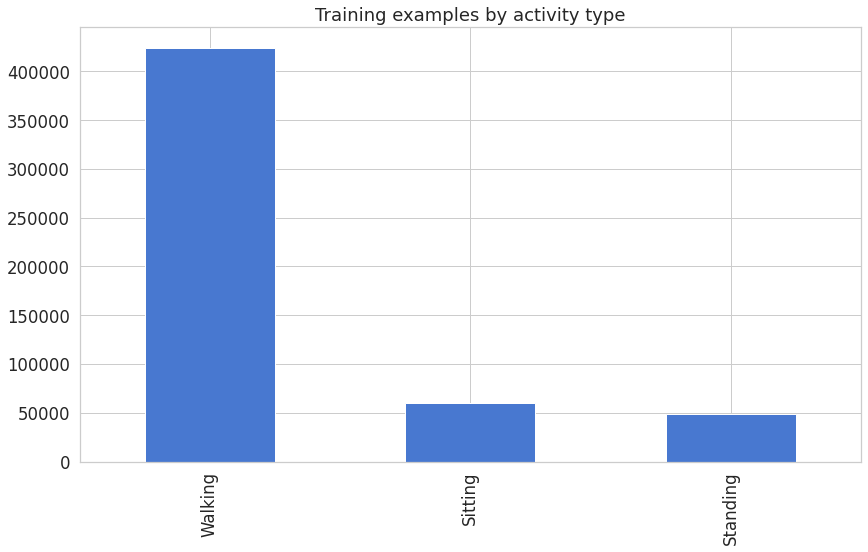

In [ ]:
countOfActivity.plot(kind='bar', title='Training examples by activity type', figsize=(14,8));

**No of samples belonging to each volunteer:**
---
The columns we will be most interested in are activity, x-axis, y-axis, z-axis.

In [ ]:
countOfActivityPerPerson=df1['user'].value_counts()
print(countOfActivityPerPerson)
totalActivity=countOfActivityPerPerson.sum() #summation of all activities of all test persons
print('Total number of activity recorded ='+ str(totalActivity))


20    34167
8     23076
19    22288
31    21636
33    19758
16    17484
3     17406
30    17237
32    17104
21    16966
29    16342
34    16301
27    16205
18    15979
7     15926
13    15885
28    15469
5     15436
6     14787
12    14757
10    14708
14    13859
26    13210
9     12923
1     12861
11    12139
2     11739
15    11529
36    10625
35     9830
17     9677
24     7490
4      7336
22     7029
25     6979
23     6589
Name: user, dtype: int64
Total number of activity recorded =532732


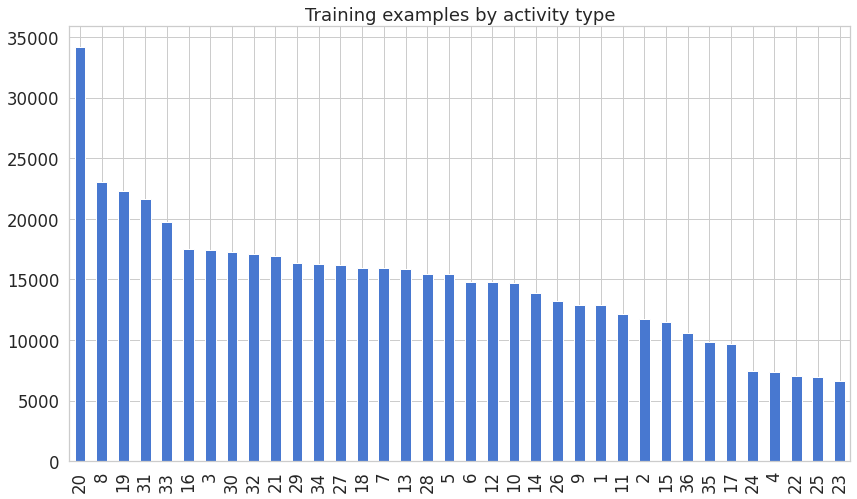

In [ ]:
countOfActivityPerPerson.plot(kind='bar', title='Training examples by activity type', figsize=(14,8));

**How does accelerometer data looks like visually:**
---

In [ ]:
def plot_activity(activity, df1):
  extractRowsOfActivity = (df1['activity'] == activity) #output will be true/false
  data = df1[extractRowsOfActivity] # it will give only rows corresponding to specific activity
  data = data[['x-axis','y-axis','z-axis']] # only select rows corresponding to x,y and z axis
  data = data[:120] # limit the number of rows to initial 200 of ploatting
  ax = data.plot(subplots=True, figsize=(16,12), title=activity) # Plotting individual column of data frame

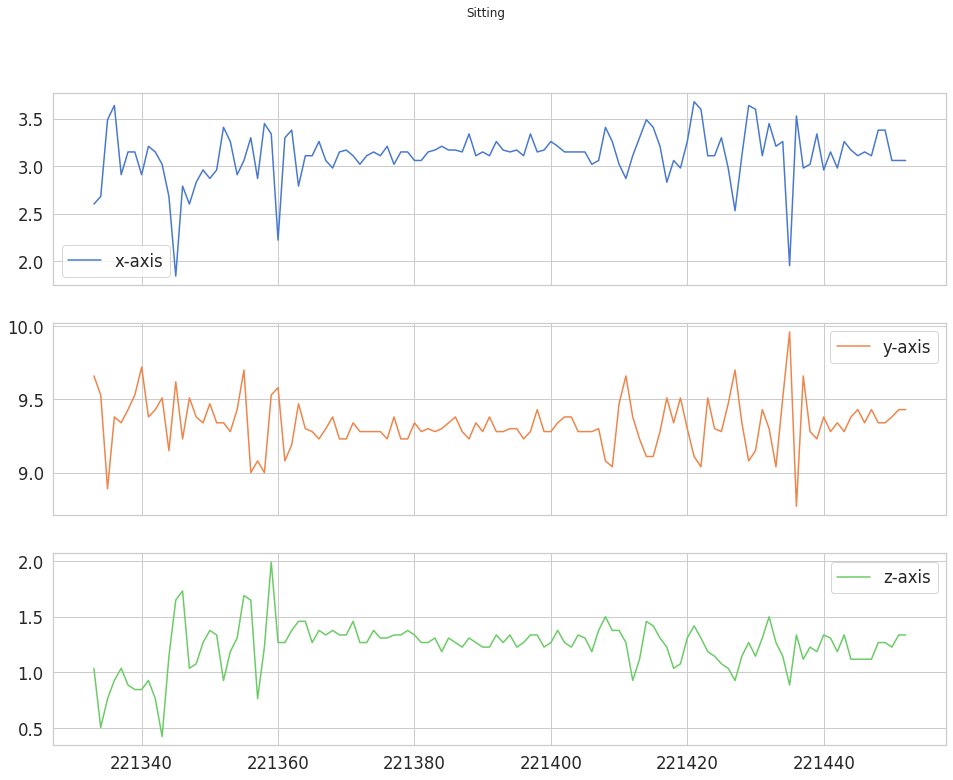

In [ ]:
plot_activity("Sitting",df1)

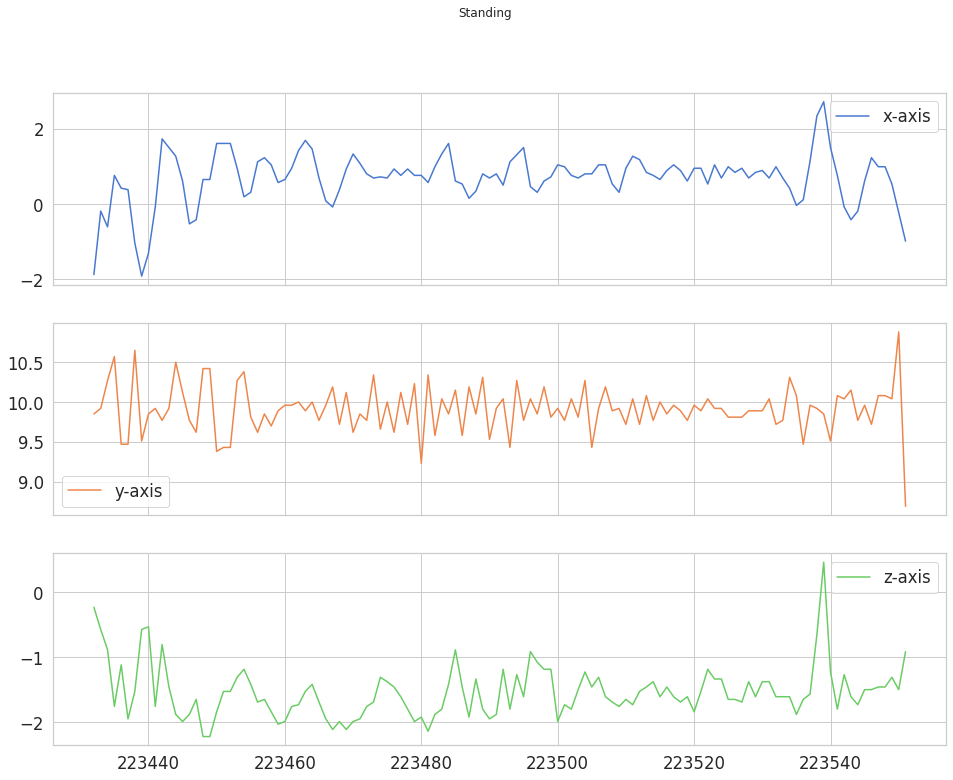

In [ ]:
plot_activity("Standing",df1)

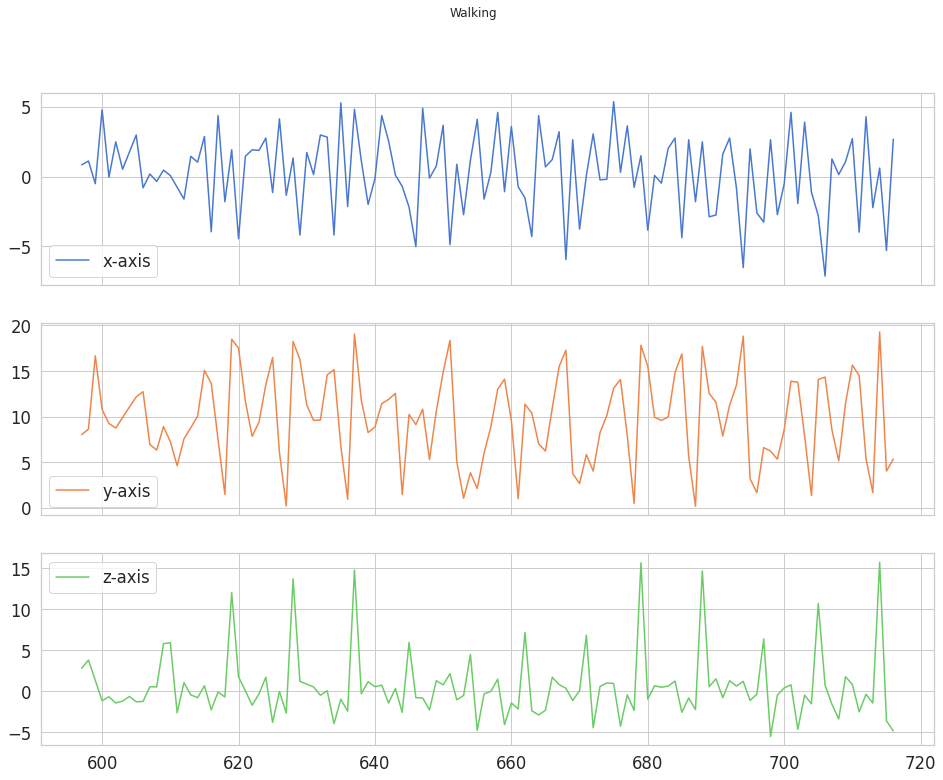

In [ ]:
plot_activity("Walking",df1)

**Preprocessing**
---

In [ ]:
df1.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
597,33,Walking,49394992294000,0.844462,8.008764,2.792171
598,33,Walking,49395102310000,1.116869,8.621680,3.786457
599,33,Walking,49395202316000,-0.503953,16.657684,1.307553
600,33,Walking,49395302292000,4.794363,10.760075,-1.184970
601,33,Walking,49395412338000,-0.040861,9.234595,-0.694638


In [ ]:
X_train = df1[df1.columns[3:6]]
y_train = df1[df1.columns[1:2]]

In [ ]:
X_train

,x-axis,y-axis,z-axis
597,0.844462,8.008764,2.792171
598,1.116869,8.621680,3.786457
599,-0.503953,16.657684,1.307553
600,4.794363,10.760075,-1.184970
601,-0.040861,9.234595,-0.694638
...,...,...,...
1098199,9.000000,-1.570000,1.690000
1098200,9.040000,-1.460000,1.730000
1098201,9.080000,-1.380000,1.690000
1098202,9.000000,-1.460000,1.730000


In [ ]:
y_train

,activity
597,Walking
598,Walking
599,Walking
600,Walking
601,Walking
...,...
1098199,Sitting
1098200,Sitting
1098201,Sitting
1098202,Sitting


In [ ]:
y_train.activity.unique()

array(['Walking', 'Sitting', 'Standing'], dtype=object)

**Encode activity into number**
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**split data into training and validation dataset**
---

In [ ]:

X_train,X_test,y_train, y_test =train_test_split(X_train, y_train)

print("X_train shape ", X_train.shape)
print("Y train shape ", y_train.shape)
print("X_test shape ", X_test.shape)
print("y_test shape ", y_test.shape)

X_train shape  (399549, 3)
Y train shape  (399549,)
X_test shape  (133183, 3)
y_test shape  (133183,)


**convert data into time series sequence**
---

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
Fs = 20
time_interval = Fs*120
batchsize1 = int(399549/time_interval)
batchsize2 = int(133183/time_interval)
n_time_steps = Fs*6
n_features = 3

print(batchsize1)
print(batchsize2)

166
55


In [ ]:
train_gen = TimeseriesGenerator(X_train.to_numpy(), y_train, length=n_time_steps, batch_size=batchsize1)
test_gen = TimeseriesGenerator(X_test.to_numpy(), y_test, length=n_time_steps, batch_size=batchsize2)

**Create and compile LSTM Model**
---

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, LSTM
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (n_time_steps, n_features),
              kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='lstm_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(64, activation='relu',kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='dense_1' ))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 120, 32)           4608      
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                245824    
                                                                 
 output (Dense)              (None, 3)                 195       
                                                                 
Total params: 250,627
Trainable params: 250,627
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

**Start Training**
---

In [ ]:
history = model.fit_generator(train_gen, epochs=5, validation_data=test_gen, callbacks=callbacks)
#history = model.fit(Xtrain, Ytrain, batch_size = 32, epochs = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
2406/2407 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.4042
Epoch 1: val_loss did not improve from inf
2407/2407 [==============================] - 43s 15ms/step - loss: nan - accuracy: 0.4040 - val_loss: nan - val_accuracy: 0.1131
Epoch 2/5
2403/2407 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1123
Epoch 2: val_loss did not improve from inf
2407/2407 [==============================] - 35s 15ms/step - loss: nan - accuracy: 0.1123 - val_loss: nan - val_accuracy: 0.1131
Epoch 3/5
2406/2407 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1123
Epoch 3: val_loss did not improve from inf
2407/2407 [==============================] - 37s 15ms/step - loss: nan - accuracy: 0.1123 - val_loss: nan - val_accuracy: 0.1131
Epoch 4/5
2407/2407 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1123
Epoch 4: val_loss did not improve from inf
2407/2407 [==============================] - 37s 15ms/step - loss

**Data preprocessing**
---


*  Modelling time series 
*  LSTM RNN
*  200 training sample sequence
*  Dividing the whole data into multiple slices


In [ ]:
#issue during model training of shape in trainy


**Transforming shape of segments**
---

**Encoding of labels(Walking, Sitting, Jogging etc.)**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32) #pd.getdummies is used for one hot encoding #get_dummies function of pandas is used for one hot encoding 


NameError: ignored

In [ ]:
print(labels)
print(labels.shape)

Finally, let's split the data into training and test(20%) set:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

**Building the model**
---
* 2 fully-connected and 2 LSTM layers
* 64 units each

In [ ]:
N_CLASSES = 6
N_HIDDEN_UNITS = 64 #LSTM layers

In [ ]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
def create_LSTM_model(inputs):
  W = {
      'hidden': tf.Variable(tf.random_normal([N_FEATURES,N_HIDDEN_UNITS])), #3*64
      'output': tf.Variable(tf.random_normal([N_FEATURES,N_HIDDEN_UNITS])) # 64*6
  }
  biases = {
     'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),  #64
     'output': tf.Variable(tf.random_normal([N_CLASSES]))        #6
      }
 
  X = tf.transpose(inputs,[1, 0, 2])
  X = tf.reshape(X, [-1,N_FEATURES])
  hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
  hidden = tf.split(hidden, N_TIME_STEPS, 0)
  #stack 2 LSTM LAYERS
  lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias= 1.0) for _ in range(2)] #create 2 LSTM LAYERS
  lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers) # Stacks them
  outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32) # Actually creates a LSTM network out of LSTM layers
  # Get output for the last time step
  lstm_last_output = outputs[-1]
  return tf.matmul(lstm_last_output, W['output']) + biases['output']



**Creating Placeholders:**
---

In [ ]:
tf.reset_default_graph() # to clear default graph
tf.compat.v1.disable_eager_execution()
X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input") # X values that must be fed using feed diet
Y = tf.placeholder(tf.float32, [None, N_CLASSES]) #Y values that must be fed using feed dict


**Creating the model:**
---


In [ ]:
#pred_Y = create_LSTM_model(X)
#pred_softmax = tf.nn.softmax(pred_Y, name="y_")


In [ ]:
#function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Data directory
DATADIR = 'UCI HAR Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
    ]

In [ ]:
# function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [ ]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/My Drive/UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [ ]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [ ]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
import pandas as pd
import numpy as np

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

epochs = 30
batch_size = 16
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y)


# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(N_CLASSES, activation='sigmoid'))
model.summary()

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test),epochs=epochs)

In [ ]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# function to print the confusion matrix

def confusion_matrix(Y_true, Y_pred):
    
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

    
   # result = confusion_matrix(Y_true, Y_pred)

    #plt.figure(figsize=(10, 8))
   # sns.heatmap(result, 
    #            xticklabels= list(ACTIVITIES.values()), 
     #           yticklabels=list(ACTIVITIES.values()), 
      #          annot=True, fmt="d");
   # plt.title("Confusion matrix")
   # plt.ylabel('True label')
   # plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Confusion Matrix
confusion_matrix(Y_test, model.predict(X_test))

In [ ]:
score = model.evaluate(X_test, Y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)